In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import matplotlib

In [4]:
matplotlib.rcParams['font.sans-serif'] = ['Arial Unicode MS']
matplotlib.rcParams['axes.unicode_minus'] = False #setting fonts

In [5]:
train = pd.read_csv('train.csv')

In [6]:
test = pd.read_csv('test.csv')

In [7]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
full = pd.concat([train, test], ignore_index=True)
print('merged dataset:', full.shape) #merging train and test dataset

merged dataset: (1309, 12)


In [10]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [11]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [12]:
full.describe() #describe dataset- to find missing value

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [13]:
full['Age']=full['Age'].fillna(full['Age'].mean())#Filling in missing values

In [14]:
full['Fare'] = full['Fare'].fillna( full['Fare'].mean() )

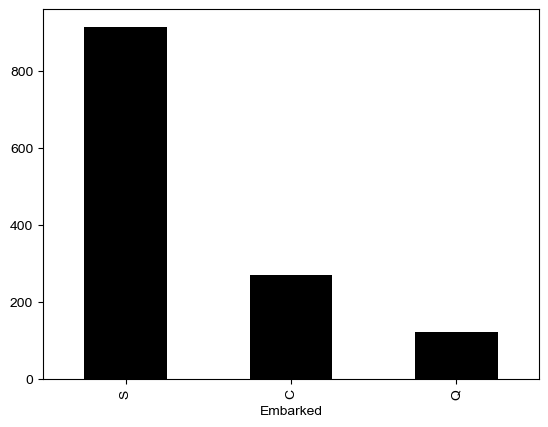

In [15]:
a=full['Embarked'].value_counts()
a.plot.bar(color='black')
full['Embarked']=full['Embarked'].fillna('S')

In [16]:
full['Cabin'].head()

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

In [17]:
full['Cabin'] = full['Cabin'].fillna('U') #Replace missing values in cabin with the string U

In [18]:
fig = plt.figure()
Survived_cabin = train.Survived[pd.notnull(full.Cabin)].value_counts()
Survived_nocabin = train.Survived[pd.isnull(full.Cabin)].value_counts()

<Figure size 640x480 with 0 Axes>

Text(0.5, 1.0, 'Percentage of cabin')

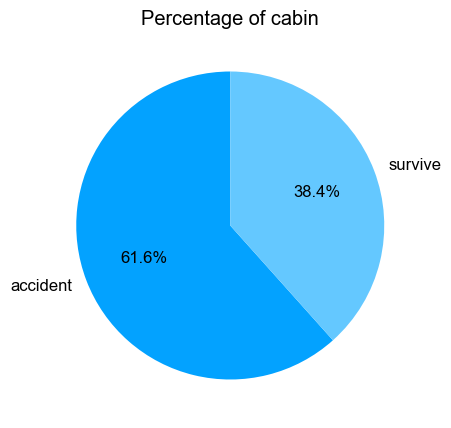

In [19]:
plt.rc('font',family='Arial',size=12)#font
fig=plt.figure(figsize=(5,5))
ax1=fig.add_subplot(1,1,1)
labels=['accident','survive']
colors=['#03A2FF','#64C8FF']
ax1.pie(Survived_cabin,labels=labels,colors=colors,startangle=90,autopct='%1.1f%%')
ax1.set_title('Percentage of cabin')

In [20]:
def getTitle(name):
    str1=name.split(',')[1]#Mr.Owen Harris
    str2=str1.split('.')[0]#Mr
    #The strip() method is used to remove the beginning and end of the string (defaults to spaces)
    str3=str2.strip()
    return str3
#Storing the extracted features
titleDf=pd.DataFrame()
#map function: applies a custom function to each of the data in the Series.
titleDf['Title']=full['Name'].map(getTitle)
titleDf.head()
#Mapping of title strings in names to defined title categories
title_mapDict={
                'Capt':        'Officer',
                'Col':         'Officer',
                'Major':       'Officer',
                'Jonkheer':    'Royalty',
                'Don':         'Royalty',
                'Sir':         'Royalty',
                'Dr':          'Officer',
                'Rev':         'Officer',
                'the Countess': 'Royalty',
                'Dona':         'Royalty',
                'Mme':          'Mrs',
                'Mlle':         'Miss',
                'Ms':           'Mrs',
                'Mr':           'Mr',
                'Mrs':          'Mrs',
                'Miss':         'Miss',
                'Master':       'Master',
                'Lady':         'Royalty'}
titleDf['Title']=titleDf['Title'].map(title_mapDict)

In [21]:
titleDf.head()

,Title
0,Mr
1,Mrs
2,Miss
3,Mrs
4,Mr


In [22]:
full=pd.concat([full,titleDf],axis=1)

In [23]:
full.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U,S,Mr


In [24]:
def survived_rate1(string):
    survivedRate = full.groupby([string, 'Survived']).Survived.count().unstack()
    survivedRate['Total'] = survivedRate[0].values + survivedRate[1].values
    survivedRate['Rate Survived'] = survivedRate[1].values / survivedRate['Total'].values
    
    survivedRate = survivedRate.sort_values(by='Rate Survived', ascending=True)
    
    
    survivedRate = survivedRate.fillna(0)
    survivedRate.rename(columns={0: "die", 1: "survived"}, inplace=True)
    
    # create object of chart
    fig = plt.figure(figsize=(6, 6))
    
    survivedRate[["die", "survived"]].plot(kind="barh", stacked=True, color=["k", "g"])
    plt.grid(axis="x", ls="-")
    plt.ylabel(string, fontsize=15)
    plt.xlabel("Number", fontsize=15)

<Figure size 600x600 with 0 Axes>

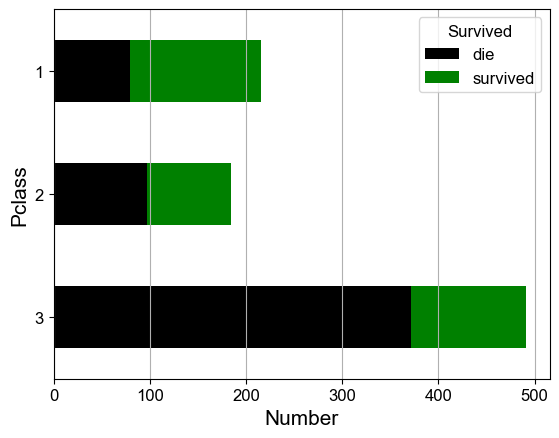

In [25]:
survived_rate1("Pclass")

In [26]:
def survived_rate2(string):
    
    survivedRate = full.groupby([string, 'Survived']).Survived.count().unstack()
    survivedRate['Total'] = survivedRate[0].values + survivedRate[1].values
    survivedRate['Rate Survived'] = survivedRate[1].values / survivedRate['Total'].values
    
    
    survivedRate = survivedRate.sort_values(by='Rate Survived', ascending=True)
    
    
    survivedRate = survivedRate.fillna(0)
    survivedRate.rename(columns={0: "die", 1: "survived"}, inplace=True)
    
    
    fig = plt.figure(figsize=(6,6))
    
    
    survivedRate[["die", "survived"]].plot(kind="line", color=["b", "r"])
    
    plt.grid(axis="y", ls="-")
    plt.ylabel("Number of Passengers", fontsize=15)  
    plt.xlabel(string, fontsize=15)

<Figure size 600x600 with 0 Axes>

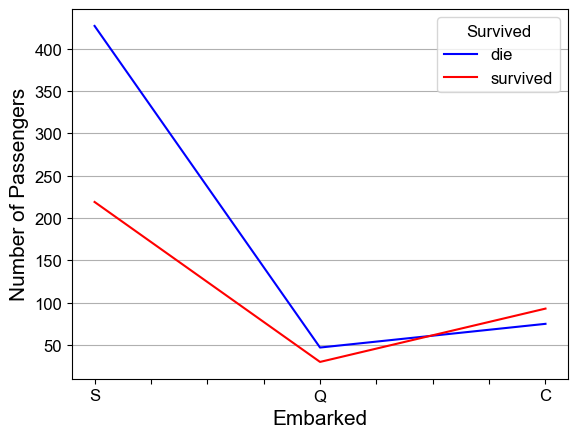

In [27]:
survived_rate2("Embarked")

In [28]:
def survived_rate3(string):
    
    survivedRate=full.groupby([string,'Survived']).Survived.count().unstack()
    survivedRate['Total']=survivedRate[0].values+survivedRate[1].values
    survivedRate['Rate Survived']=survivedRate[1].values/survivedRate['Total'].values
    
    survivedRate=survivedRate.sort_values(by='Rate Survived',ascending=True)
    
    survivedRate=survivedRate.fillna(0)
    survivedRate.rename(columns={0:"die",1:"survive"},inplace=True)
    survivedRate[["die","survive"]].plot(kind="bar",stacked=True,color=["k","r"])
    plt.grid(axis="y",ls="-")
    plt.ylabel("Total",fontsize=15)
    plt.xlabel(string,fontsize=15)
    fig=plt.figure(figsize=(6,6))

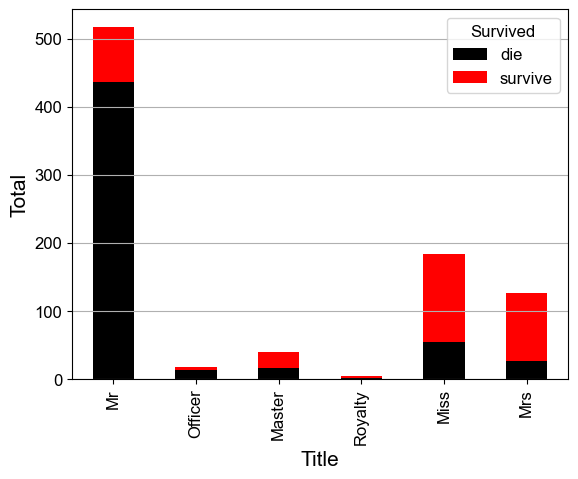

<Figure size 600x600 with 0 Axes>

In [29]:
survived_rate3("Title")

In [30]:
familyDf = pd.DataFrame()

In [31]:
familyDf['FamilySize']=full['Parch']+full['SibSp']+1

In [32]:
familyDf['Single']=familyDf['FamilySize'].map(lambda s : 1 if s==1 else 0)
familyDf['Small']=familyDf['FamilySize'].map(lambda s :1 if 2<= s <= 4 else 0)
familyDf['Large']=familyDf['FamilySize'].map(lambda s :1 if 5<= s else 0)
familyDf.head()

,FamilySize,Single,Small,Large
0,2,0,1,0
1,2,0,1,0
2,1,1,0,0
3,2,0,1,0
4,1,1,0,0


In [33]:
full = pd.concat([full,familyDf],axis=1)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [34]:
print(familyDf.head())
print(familyDf.columns)

   FamilySize  Single  Small  Large
0           2       0      1      0
1           2       0      1      0
2           1       1      0      0
3           2       0      1      0
4           1       1      0      0
Index(['FamilySize', 'Single', 'Small', 'Large'], dtype='object')


In [35]:
b = full.groupby('FamilySize')['Survived'].mean()

<Axes: xlabel='FamilySize'>

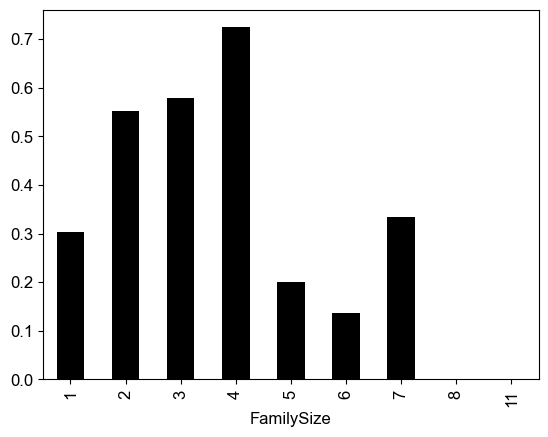

In [36]:
b.plot.bar(color='black')

In [37]:
full['Cabin'] = full['Cabin'].fillna( 'U' )

In [38]:
sex_mapDict={'male':1,
            'female':0}

In [39]:
full['Sex']=full['Sex'].map(sex_mapDict)
full.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,Single,Small,Large
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,U,S,Mr,2,0,1,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,0,1,0
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,U,S,Miss,1,1,0,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,Mrs,2,0,1,0
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,U,S,Mr,1,1,0,0


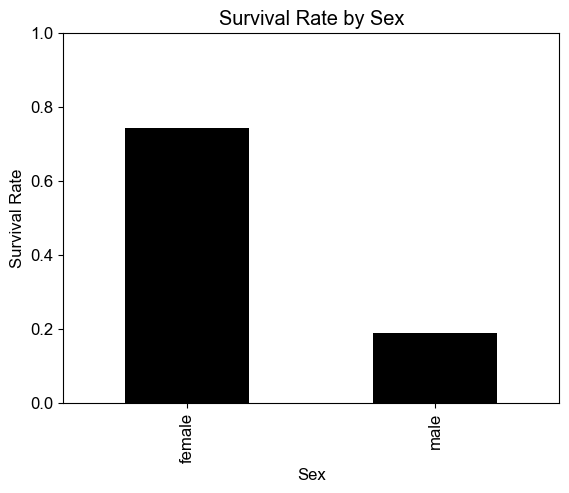

In [40]:

survival_rates = full.groupby('Sex')['Survived'].mean()


survival_rates.index = ['female' if idx == 0 else 'male' for idx in survival_rates.index]


survival_rates.plot(kind='bar', color='black')  


plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Sex')
plt.ylim(0, 1)  

plt.show()

In [41]:
embarkedDf=pd.DataFrame()

In [42]:

embarkedDf=pd.get_dummies(full['Embarked'],prefix='Embarked').astype(int)
embarkedDf.head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [43]:
full = pd.concat([full,embarkedDf],axis=1)

In [44]:
full.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,Single,Small,Large,Embarked_C,Embarked_Q,Embarked_S
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,U,S,Mr,2,0,1,0,0,0,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,0,1,0,1,0,0
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,U,S,Miss,1,1,0,0,0,0,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,Mrs,2,0,1,0,0,0,1
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,U,S,Mr,1,1,0,0,0,0,1


In [45]:
pclassDf = pd.DataFrame()

In [46]:
pclassDf = pd.get_dummies(full['Pclass'],prefix='Pclass').astype(int)
pclassDf.head()

,Pclass_1,Pclass_2,Pclass_3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [47]:
full = pd.concat([full,pclassDf],axis=1)

In [48]:
titleDf=pd.get_dummies(titleDf['Title']).astype(int)
titleDf.head()

,Master,Miss,Mr,Mrs,Officer,Royalty
0,0,0,1,0,0,0
1,0,0,0,1,0,0
2,0,1,0,0,0,0
3,0,0,0,1,0,0
4,0,0,1,0,0,0


In [49]:

full = pd.concat([full,titleDf],axis = 1)

full.drop('Name',axis = 1,inplace = True)
full.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Master,Miss,Mr,Mrs,Officer,Royalty
0,1,0.0,3,1,22.0,1,0,A/5 21171,7.2500,U,...,1,0,0,1,0,0,1,0,0,0
1,2,1.0,1,0,38.0,1,0,PC 17599,71.2833,C85,...,0,1,0,0,0,0,0,1,0,0
2,3,1.0,3,0,26.0,0,0,STON/O2. 3101282,7.9250,U,...,1,0,0,1,0,1,0,0,0,0
3,4,1.0,1,0,35.0,1,0,113803,53.1000,C123,...,1,1,0,0,0,0,0,1,0,0
4,5,0.0,3,1,35.0,0,0,373450,8.0500,U,...,1,0,0,1,0,0,1,0,0,0


In [50]:
cabinDf = pd.DataFrame()

In [51]:
full['Cabin'] = full['Cabin'].map(lambda c: c[0])

In [52]:
full['Cabin'].head()

0    U
1    C
2    U
3    C
4    U
Name: Cabin, dtype: object

In [53]:
cabinDf = pd.get_dummies(full['Cabin'],prefix='Cabin').astype(int)
cabinDf.head()

,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1


In [54]:
full = pd.concat([full,cabinDf],axis=1)

In [55]:
full.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Royalty,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,1,0.0,3,1,22.0,1,0,A/5 21171,7.2500,U,...,0,0,0,0,0,0,0,0,0,1
1,2,1.0,1,0,38.0,1,0,PC 17599,71.2833,C,...,0,0,0,1,0,0,0,0,0,0
2,3,1.0,3,0,26.0,0,0,STON/O2. 3101282,7.9250,U,...,0,0,0,0,0,0,0,0,0,1
3,4,1.0,1,0,35.0,1,0,113803,53.1000,C,...,0,0,0,1,0,0,0,0,0,0
4,5,0.0,3,1,35.0,0,0,373450,8.0500,U,...,0,0,0,0,0,0,0,0,0,1


In [56]:
print(full.dtypes)

PassengerId      int64
Survived       float64
Pclass           int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Title           object
FamilySize       int64
Single           int64
Small            int64
Large            int64
Embarked_C       int64
Embarked_Q       int64
Embarked_S       int64
Pclass_1         int64
Pclass_2         int64
Pclass_3         int64
Master           int64
Miss             int64
Mr               int64
Mrs              int64
Officer          int64
Royalty          int64
Cabin_A          int64
Cabin_B          int64
Cabin_C          int64
Cabin_D          int64
Cabin_E          int64
Cabin_F          int64
Cabin_G          int64
Cabin_T          int64
Cabin_U          int64
dtype: object


In [57]:
full.drop('Embarked',axis = 1,inplace = True)
full.drop('Cabin',axis = 1,inplace = True)
full.drop('Title',axis = 1,inplace = True)
full.drop('Ticket',axis = 1,inplace = True)

In [58]:
print(full.dtypes)

PassengerId      int64
Survived       float64
Pclass           int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
FamilySize       int64
Single           int64
Small            int64
Large            int64
Embarked_C       int64
Embarked_Q       int64
Embarked_S       int64
Pclass_1         int64
Pclass_2         int64
Pclass_3         int64
Master           int64
Miss             int64
Mr               int64
Mrs              int64
Officer          int64
Royalty          int64
Cabin_A          int64
Cabin_B          int64
Cabin_C          int64
Cabin_D          int64
Cabin_E          int64
Cabin_F          int64
Cabin_G          int64
Cabin_T          int64
Cabin_U          int64
dtype: object


In [59]:
corrDf = full.corr()
corrDf
corrDf['Survived'].sort_values(ascending =False)

Survived       1.000000
Mrs            0.344935
Miss           0.332795
Pclass_1       0.285904
Small          0.279855
Fare           0.257307
Cabin_B        0.175095
Embarked_C     0.168240
Cabin_D        0.150716
Cabin_E        0.145321
Cabin_C        0.114652
Pclass_2       0.093349
Master         0.085221
Parch          0.081629
Cabin_F        0.057935
Royalty        0.033391
Cabin_A        0.022287
FamilySize     0.016639
Cabin_G        0.016040
Embarked_Q     0.003650
PassengerId   -0.005007
Cabin_T       -0.026456
Officer       -0.031316
SibSp         -0.035322
Age           -0.070323
Large         -0.125147
Embarked_S    -0.149683
Single        -0.203367
Cabin_U       -0.316912
Pclass_3      -0.322308
Pclass        -0.338481
Sex           -0.543351
Mr            -0.549199
Name: Survived, dtype: float64

In [60]:
train = pd.read_csv('train.csv')

In [61]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [62]:
features=['Pclass',  'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

In [63]:
data=train[features].values.copy()
data
#target
target=train.Survived.values.copy()
target

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [64]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [65]:
features = ['Pclass', 'Age', 'Fare'] + [col for col in full.columns if 'Sex_' in col or 'Embarked_' in col or 'Cabin_' in col]
data = full[features].iloc[:len(train)].values
target = train['Survived'].values

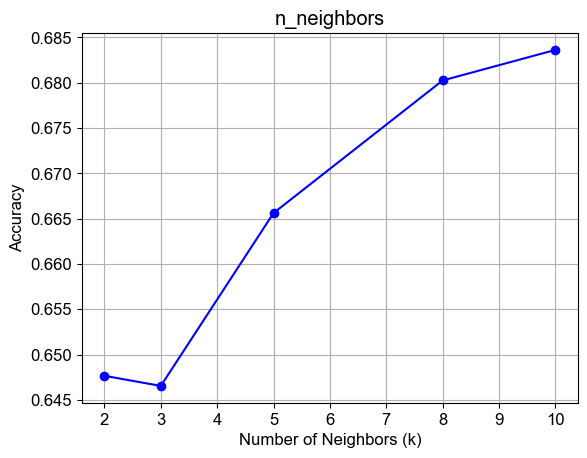

In [66]:
def para_tune(para,data,target):
    clf =KNeighborsClassifier(n_neighbors = para)  # n_estimators 设置为parameter
    score = np.mean(cross_val_score(clf,data,target,scoring="accuracy"))
    return score

def accurate_curve(para_range,data,target,title):
    score = []
    for para in para_range:
        score.append(para_tune(para,data,target))
    plt.figure()
    plt.title(title)
    plt.xlabel("Number of Neighbors (k)")
    plt.ylabel("Accuracy")
    plt.grid()
    plt.plot(para_range,score,"o-",color='b')
    return plt
g = accurate_curve([2,3,5,8,10],data,target,"n_neighbors")

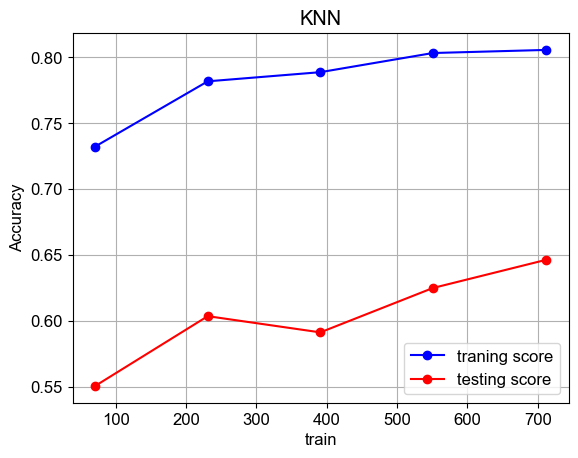

In [67]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

def plot_learning_curve(estimator, title, data, target, cv=5,
                        train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title) 
    plt.xlabel('train')
    plt.ylabel('Accuracy') 
    train_sizes, train_scores, test_scores = learning_curve(estimator,data, target, cv=cv,
                                                            train_sizes=train_sizes) 
    train_scores_mean = np.mean(train_scores, axis=1) 
    test_scores_mean = np.mean(test_scores, axis=1)
    plt.grid() 

    plt.plot(train_sizes, train_scores_mean, 'o-', color='b',
             label='traning score') 
    plt.plot(train_sizes, test_scores_mean, 'o-', color='r',
             label='testing score') 
    plt.legend(loc='best')
    return plt

g = plot_learning_curve(KNeighborsClassifier(n_neighbors = 3), 'KNN',data, target) 

In [68]:
from sklearn.ensemble import RandomForestClassifier

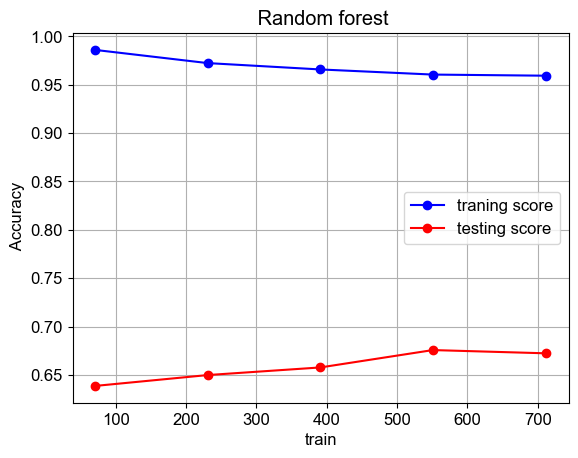

In [69]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt


def plot_learning_curve(estimator, title, data, target, cv=5,
                        train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title) 
    plt.xlabel('train') 
    plt.ylabel(' Accuracy') 
    train_sizes, train_scores, test_scores = learning_curve(estimator,data, target, cv=cv,
                                                            train_sizes=train_sizes) 
    train_scores_mean = np.mean(train_scores, axis=1) 
    train_scores_std = np.std(train_scores, axis=1) 
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.plot(train_sizes, train_scores_mean, 'o-', color='b',
             label='traning score') 
    plt.plot(train_sizes, test_scores_mean, 'o-', color='r',
             label='testing score') 
    plt.legend(loc='best')
    return plt

g = plot_learning_curve(RandomForestClassifier(), ' Random forest',data,target)

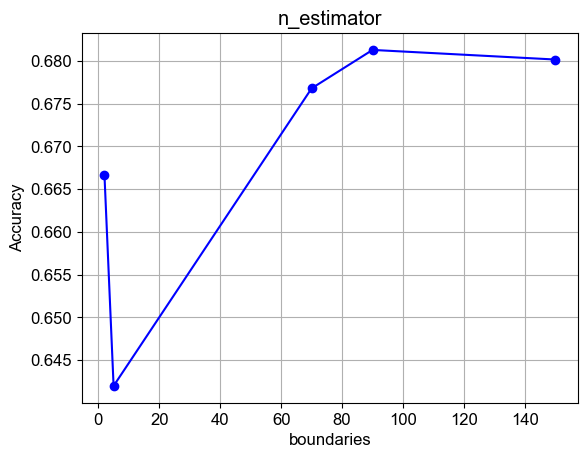

In [70]:
def para_tune(para,data,target):
    clf = RandomForestClassifier(n_estimators=para)  
    score = np.mean(cross_val_score(clf,data,target,scoring="accuracy"))
    return score

def accurate_curve(para_range,data,target,title):
    score = []
    for para in para_range:
        score.append(para_tune(para,data,target))
    plt.figure()
    plt.title(title)
    plt.xlabel("boundaries")
    plt.ylabel("Accuracy")
    plt.grid()
    plt.plot(para_range,score,"o-",color='b')
    return plt
g = accurate_curve([2,5,70,90,150],data,target,"n_estimator")

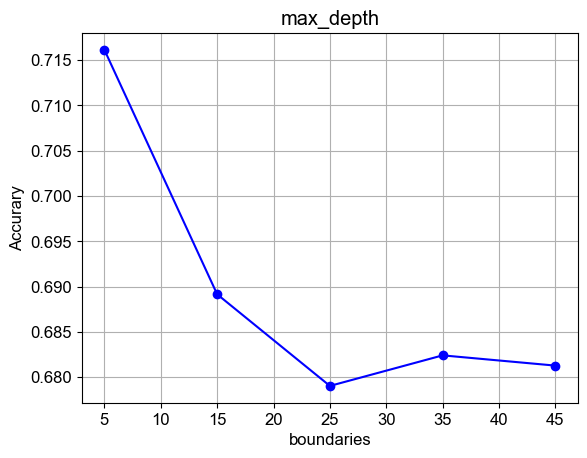

In [71]:
def para_tune(para, data,target):
    clf = RandomForestClassifier(n_estimators=300, max_depth=para)
    score = np.mean(cross_val_score(clf, data,target, scoring='accuracy'))
    return score

def accurate_curve(para_range, data,target, title):
    score = []
    for para in para_range:
        score.append(para_tune(para, data,target))
    plt.figure()
    plt.title(title)
    plt.xlabel('boundaries')
    plt.ylabel('Accurary')
    plt.grid()
    plt.plot(para_range, score, 'o-',color='b')
    return plt

g = accurate_curve([5, 15, 25, 35, 45], data,target, 'max_depth')

In [ ]:
from sklearn.model_selection import GridSearchCV

def plot_learning_curve(estimator, title, data,target, cv=5,
                        train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title) 
    plt.xlabel('train') 
    plt.ylabel('accurary')
    train_sizes, train_scores, test_scores = learning_curve(estimator,data,target, cv=cv,
                                                            train_sizes=train_sizes) 
    train_scores_mean = np.mean(train_scores, axis=1) 
    test_scores_mean = np.mean(test_scores, axis=1)
    plt.grid() 

    plt.plot(train_sizes, train_scores_mean, 'o-', color='b',
             label='traning score') 
    plt.plot(train_sizes, test_scores_mean, 'o-', color='r',
             label='testing score') 
    plt.legend(loc='best')
    return plt
clf = RandomForestClassifier()
para_grid = {'max_depth': [5], 'n_estimators': [90], 'max_features': [1, 5, 10], 'criterion': ['gini', 'entropy'],
             'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 5, 10]}
gs = GridSearchCV(clf, param_grid=para_grid, cv=3, scoring='accuracy')
gs.fit(data,target)
gs_best = gs.best_estimator_ 
gs.best_score_ 
g = plot_learning_curve(gs_best, 'ramdon forest',data,target)

In [ ]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
skf= StratifiedKFold(n_splits=5)

In [ ]:
for train,test in skf.split(data,target):
    x_train=data[train]
    x_test=data[test]
    y_train=target[train]
    y_test=target[test]

In [ ]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.feature_selection import SelectFromModel 
clf=RandomForestRegressor(n_estimators=50) 
clf.fit(x_train,y_train)
 
features = pd.DataFrame() 
features['feature'] = ['Pclass','Sex_male','Sex_female','Age','Sibsp','Parch','Fare','Embarked_C','Embarked_Q','Embarked_S','Cabin_A','Cabin_B','Cabin_C','Cabin_D','Cabin_U'] 
features['importance'] = clf.feature_importances_ 
features.sort_values( by=['importance'],ascending=True,inplace=True) 
features.set_index('feature',inplace=True)
features.plot(kind='bar', figsize=(10, 6), fontsize=10, color='g')
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance in Random Forest")
plt.show()

In [ ]:
print(f"Number of features: {len(features)}")

In [ ]:
print(f"Feature importances length: {len(clf.feature_importances_)}")

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def plot_learning_curve(estimator, title, data,target, ylim=None, cv=None, n_jobs=1, 
                        train_sizes=np.linspace(.1, 1.0, 5), verbose=0, plot=True):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, data,target, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, verbose=verbose)
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    if plot:
        plt.figure() 
        plt.title(title)
        if ylim is not None:
            plt.ylim(*ylim)
        plt.xlabel(u"train")
        plt.ylabel(u"accurary")
        plt.gca().invert_yaxis()
        plt.grid()
        plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label="training score")
        plt.plot(train_sizes, test_scores_mean, 'o-', color="r", label="testing score")
        plt.legend(loc="best")
        plt.draw()
        plt.gca().invert_yaxis()
        plt.show()
plot_learning_curve(model, "logicistRegression",data,target)

In [ ]:
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import cross_val_score

In [ ]:
model1= SVC()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def plot_learning_curve(estimator, title, data,target, ylim=None, cv=None, n_jobs=1, 
                        train_sizes=np.linspace(.1, 1.0, 5), verbose=0, plot=True):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, data,target, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, verbose=verbose)
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
   
    if plot:
        plt.figure()
        plt.title(title)
        if ylim is not None:
            plt.ylim(*ylim)
        plt.xlabel(u"train")
        plt.ylabel(u"accurary")
        plt.gca().invert_yaxis()
        plt.grid()
        plt.plot(train_sizes, train_scores_mean, 'o-', color="g", label="training score")
        plt.plot(train_sizes, test_scores_mean, 'o-', color="r", label="testing score")
        plt.legend(loc="best")
        plt.draw()
        plt.gca().invert_yaxis()
        plt.show()
plot_learning_curve(model1, "SVC",data,target)

In [ ]:
skf= StratifiedKFold(n_splits=5)

In [ ]:
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.metrics import confusion_matrix 

In [ ]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict

In [ ]:
import seaborn as sns

In [ ]:
f,ax=plt.subplots(2,2,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),data,target,cv=10)
sns.heatmap(confusion_matrix(target,y_pred),ax=ax[0,0],annot=True,fmt='2.0f',cmap='GnBu')
ax[0,0].set_title('confusion SVC')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),data,target,cv=10)
sns.heatmap(confusion_matrix(target,y_pred),ax=ax[0,1],annot=True,fmt='2.0f',cmap='coolwarm')
ax[0,1].set_title('confusion KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),data,target,cv=10)
sns.heatmap(confusion_matrix(target,y_pred),ax=ax[1,0],annot=True,fmt='2.0f',cmap='OrRd')
ax[1,0].set_title('confusion randomforest')
y_pred = cross_val_predict(LogisticRegression(),data,target,cv=10)
sns.heatmap(confusion_matrix(target,y_pred),ax=ax[1,1],annot=True,fmt='2.0f',cmap='summer')
ax[1,1].set_title('confusion logisticregression')

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
data= pd.read_csv("train.csv")

In [ ]:

data= data.drop(labels=['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
data.head()

In [ ]:
data= data.dropna()

In [ ]:
data_dummy = pd.get_dummies(data[['Sex', 'Embarked']])

In [ ]:
data_conti = pd.DataFrame(data,columns=['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], index=data.index)
data = data_conti.join(data_dummy)

In [ ]:
data.head()

In [ ]:
from sklearn.model_selection import  train_test_split

In [ ]:
X = data.iloc[:, 1:]
y = data.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import cross_val_predict

In [ ]:

classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.svm import SVC, LinearSVC

In [ ]:

classifier1 = SVC()
classifier1.fit(X_train, y_train)
y_pred = classifier1.predict(X_test)
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

classifier2=KNeighborsClassifier(n_neighbors = 3)
classifier2.fit(X_train, y_train)
y_pred = classifier2.predict(X_test)
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:

classifier3=RandomForestClassifier()
classifier3.fit(X_train, y_train)
y_pred =classifier3.predict(X_test)
print(classification_report(y_test, y_pred))